# G2M Case Study
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#h">Hypothesis Generation</a></li>
<li><a href="#i">Import Packages and Loading Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#u">Univariate Exploration</a></li>
<li><a href="#b">Multivariate Exploration</a></li>


</ul>

<a id='intro'></a>
## Introduction

### Background
The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Objective
Provide actionable insights to help XYZ firm in identifying the right company for making
investment.

### Dataset 
There have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018. Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

<a id='h'></a>
## Hypothesis Generation

#### 1. Is there any seasonality in number of customers using the cab service?
#### 2. Which company has more profit at each year?
#### 3. Is the company with more profit also dominant at each city?
#### 4. Which company has higher cost per ride?
#### 5. Is there a trend between age and income?

<a id='i'></a>
## Import Packages & Loading Data

In [1]:
# Import needed packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew, norm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
Cab_df = pd.read_csv('Cab_Data.csv')
City_df = pd.read_csv('City.csv')
Customer = pd.read_csv('Customer_ID.csv')
Transaction = pd.read_csv('Transaction_ID.csv')

In [3]:
Cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

Cab_df['Date of Travel']=Cab_df['Date of Travel'].apply(lambda x:to_date_format(x))
Cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
Cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [6]:
City_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
City_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [8]:
Customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
Transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### Merging data frames together

In [33]:
data = Cab_df.merge(Transaction, on= 'Transaction ID').merge(Customer, on ='Customer ID').merge(City_df, on = 'City')

In [34]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [35]:
data['Year of Travel'] = data['Date of Travel'].dt.year
data['Month of Travel'] = data['Date of Travel'].dt.month
data['Day of Travel'] = data['Date of Travel'].dt.day
data['Profit'] = data['Price Charged'] - data['Cost of Trip']

data.sort_values('Date of Travel').head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
12812,10000429,2016-01-01,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,57474,Card,Male,34,16558,"248,968","80,021",2016,1,1,137.1860
43828,10000525,2016-01-01,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,4551,Cash,Male,19,6316,"1,955,130","164,468",2016,1,1,25.0484
297325,10001234,2016-01-01,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,38146,Cash,Male,36,6577,"671,238","25,063",2016,1,1,577.9420
316639,10001311,2016-01-01,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,53048,Card,Male,23,31566,"418,859","127,001",2016,1,1,233.9280
171893,10000927,2016-01-01,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,1808,Cash,Male,59,18999,"8,405,837","302,149",2016,1,1,635.8876


<a id='eda'></a>
## Exploratory Data Analysis

In [18]:
data.shape

(359392, 17)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359392 entries, 2016-01-07 to 2018-08-29
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Customer ID         359392 non-null  int64  
 7   Payment_Mode        359392 non-null  object 
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income (USD/Month)  359392 non-null  int64  
 11  Population          359392 non-null  object 
 12  Users               359392 non-null  object 
 13  Year of Travel      359392 non-null  int64  
 14  Month of Travel     359392 non-null  int64  
 15  Day of Travel     

In [20]:
data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Year of Travel,Month of Travel,Day of Travel,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,2017.041693,7.509243,15.641700,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,0.801378,3.428929,8.838986,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2016.000000,1.000000,1.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,2016.000000,5.000000,8.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,2017.000000,8.000000,16.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,2018.000000,11.000000,23.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,2018.000000,12.000000,31.000000,1463.966000


In [21]:
data.nunique()

Transaction ID        359392
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Customer ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
Population                19
Users                     19
Year of Travel             3
Month of Travel           12
Day of Travel             31
Profit                301825
dtype: int64

<a id='b'></a>
### Univariate Exploration


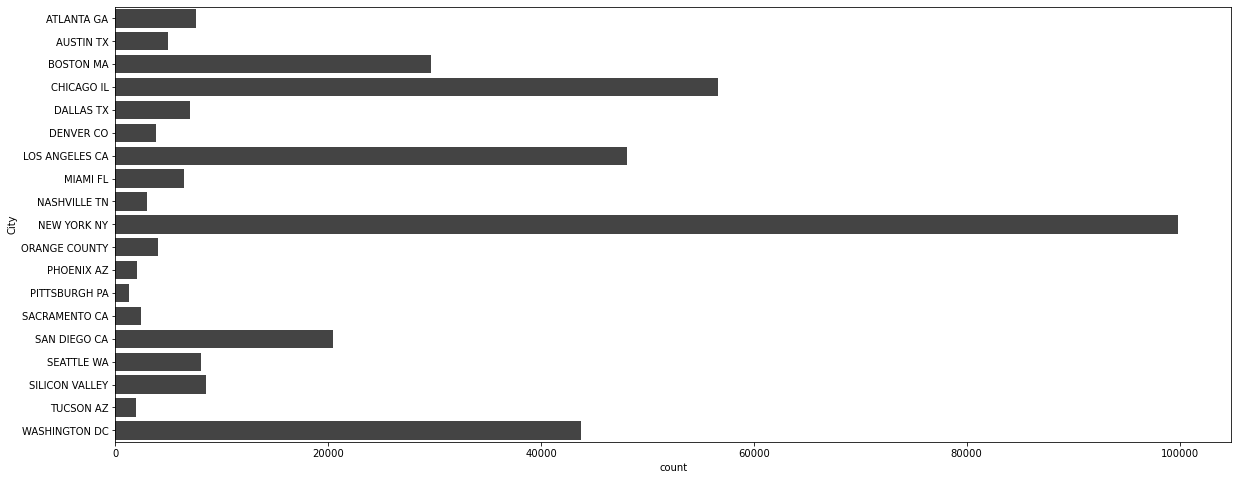

In [22]:
plt.figure(figsize=(20,8))
sb.countplot(data=data, y='City',color='#444444');
plt.show()

> As shown, the top three cities in the dataset are New York, Chicago, Los Angeles respectively. Later we will check if the city population is a factor that affects the number of rides.

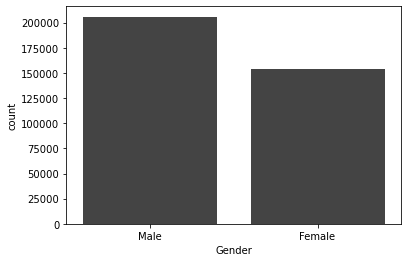

In [23]:
sb.countplot(data=data, x='Gender',color='#444444');
plt.show()

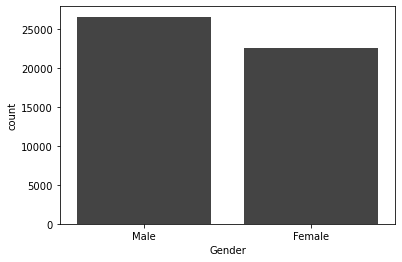

In [24]:
sb.countplot(data=Customer, x='Gender',color='#444444');
plt.show()

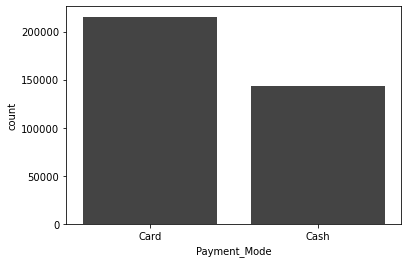

In [25]:
sb.countplot(data=data, x='Payment_Mode',color='#444444');
plt.show()

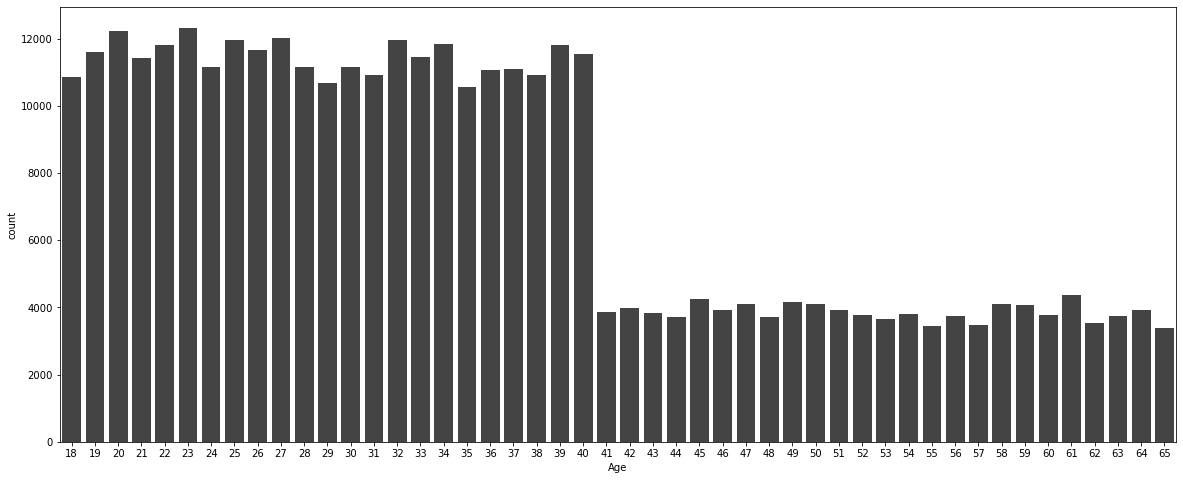

In [26]:
plt.figure(figsize=(20,8))
sb.countplot(data=data, x='Age',color='#444444');
plt.show()

> There is a wierd drop in rides after the age of 40.

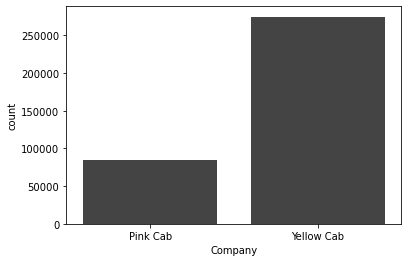

In [28]:
sb.countplot(data=data, x='Company',color='#444444');
plt.show()

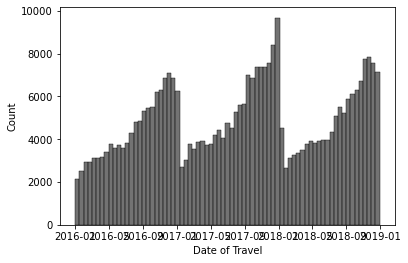

In [36]:
sb.histplot(x=data['Date of Travel'],color='#444444')
plt.show()

>It seems like there is a general trend through the year and it drops at the begenning of each new year.

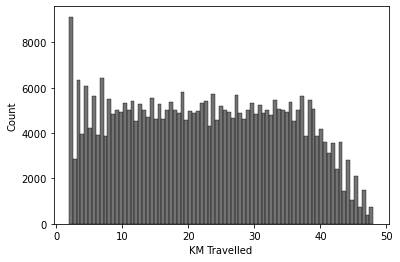

In [30]:
sb.histplot(x=data['KM Travelled'],color='#444444')
plt.show()

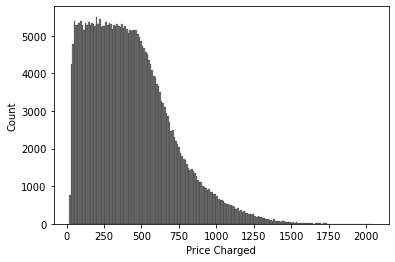

In [31]:
sb.histplot(x=data['Price Charged'],color='#444444')
plt.show()

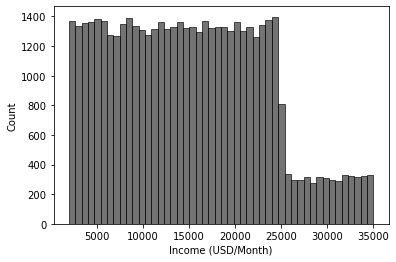

In [32]:
sb.histplot(x=Customer['Income (USD/Month)'],color='#444444')
plt.show()

> Again, There is a drop in number of people that have income > 25000. It is close to the age drop. We will checklater if they are related to each other.

<a id='b'></a>
## Multivariate Exploration

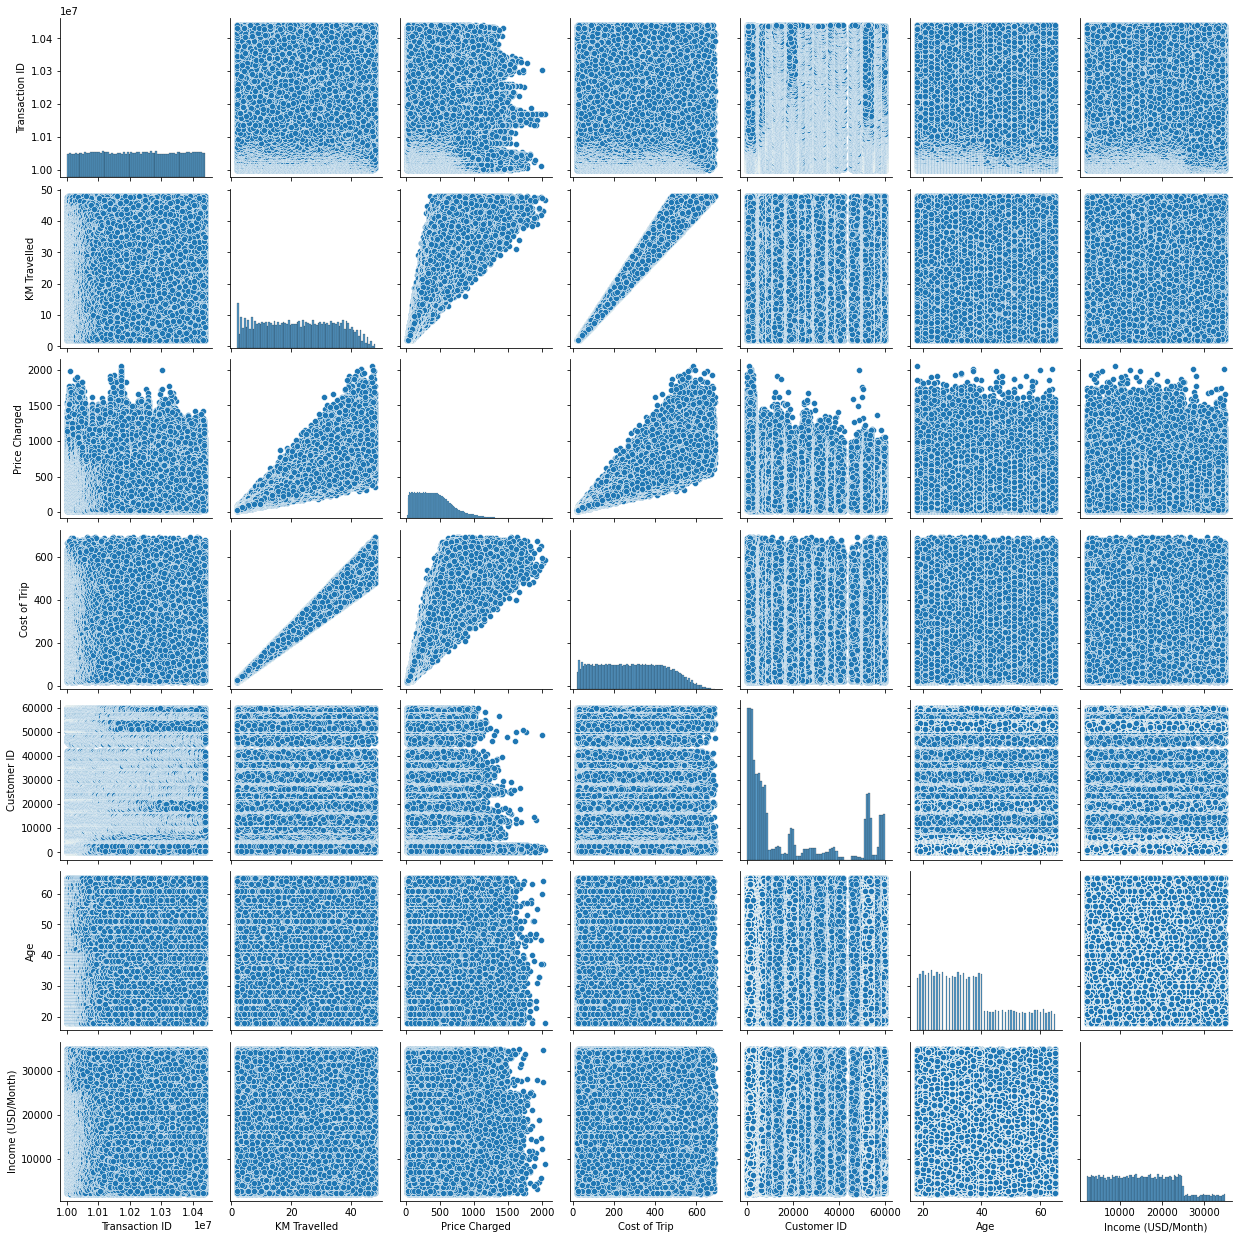

In [62]:
sb.pairplot(data)

>We could infer some points: 
> 1. Item_Visibility is inversely proportional to the sales
> 2. Item_MRP is directly proportional to the sales

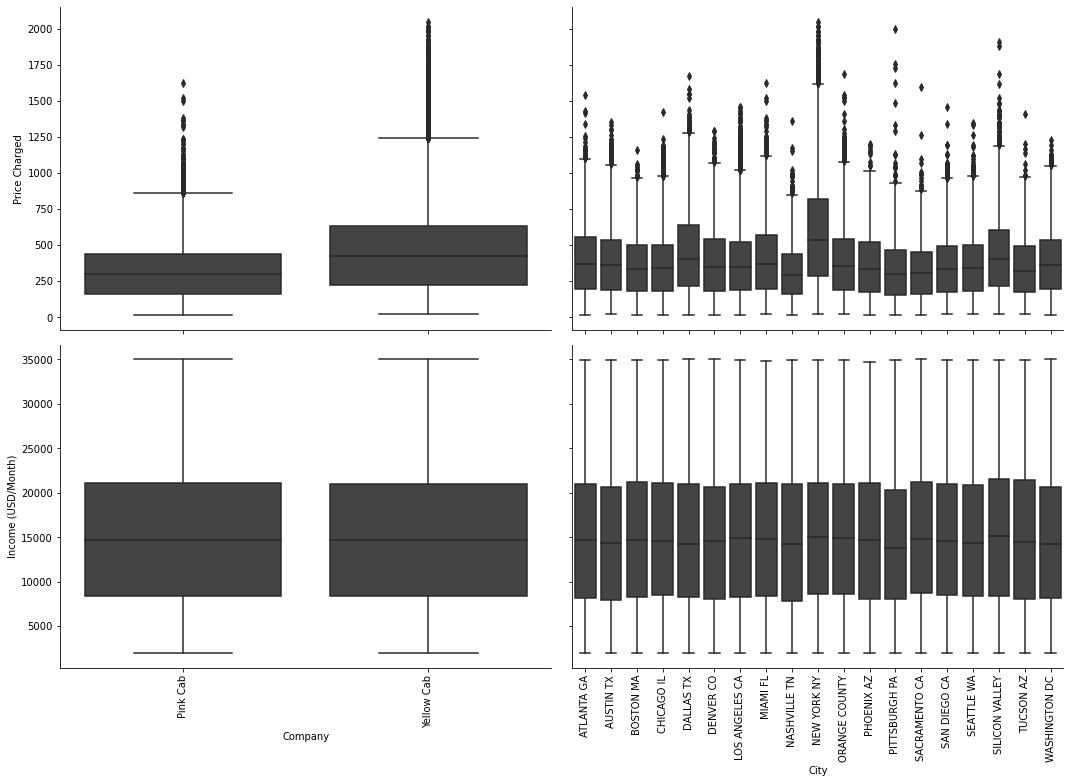

In [63]:
g = sb.PairGrid(data, y_vars = ['Price Charged','Income (USD/Month)'], x_vars = ['Company','City'], height = 5, aspect = 1.5)
g.map(sb.boxplot,color='#444444')

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

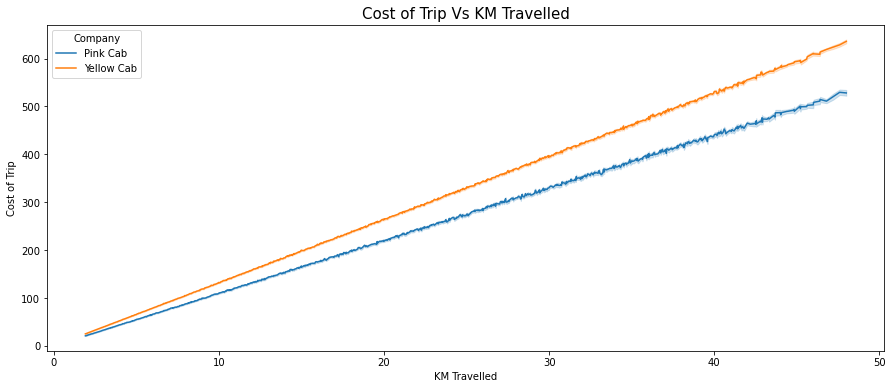

In [66]:
plt.figure(figsize=(15,6))
sb.lineplot(data=data, x="KM Travelled",y='Cost of Trip', hue='Company')
plt.title('Cost of Trip Vs KM Travelled', fontsize=15)
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')
plt.show()

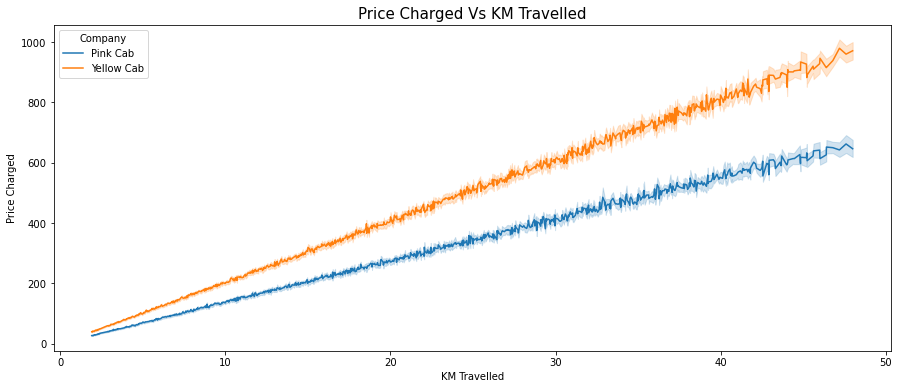

In [64]:
plt.figure(figsize=(15,6))
sb.lineplot(data=data, x="KM Travelled",y='Price Charged', hue='Company')
plt.title('Price Charged Vs KM Travelled', fontsize=15)
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.show()

>Answering hyp 4: Yellow Cab is more expensive than pink cab

In [59]:
data['count']=0
g1 = data.groupby(['Date of Travel','count','Company'], as_index=False)['count'].count()
g1

,Date of Travel,Company,count
0,2016-01-01,Pink Cab,41
1,2016-01-01,Yellow Cab,140
2,2016-01-02,Pink Cab,52
3,2016-01-02,Yellow Cab,126
4,2016-01-03,Pink Cab,4
...,...,...,...
2185,2018-12-28,Yellow Cab,630
2186,2018-12-29,Pink Cab,56
2187,2018-12-29,Yellow Cab,201
2188,2018-12-30,Pink Cab,58


<AxesSubplot:xlabel='Date of Travel', ylabel='count'>

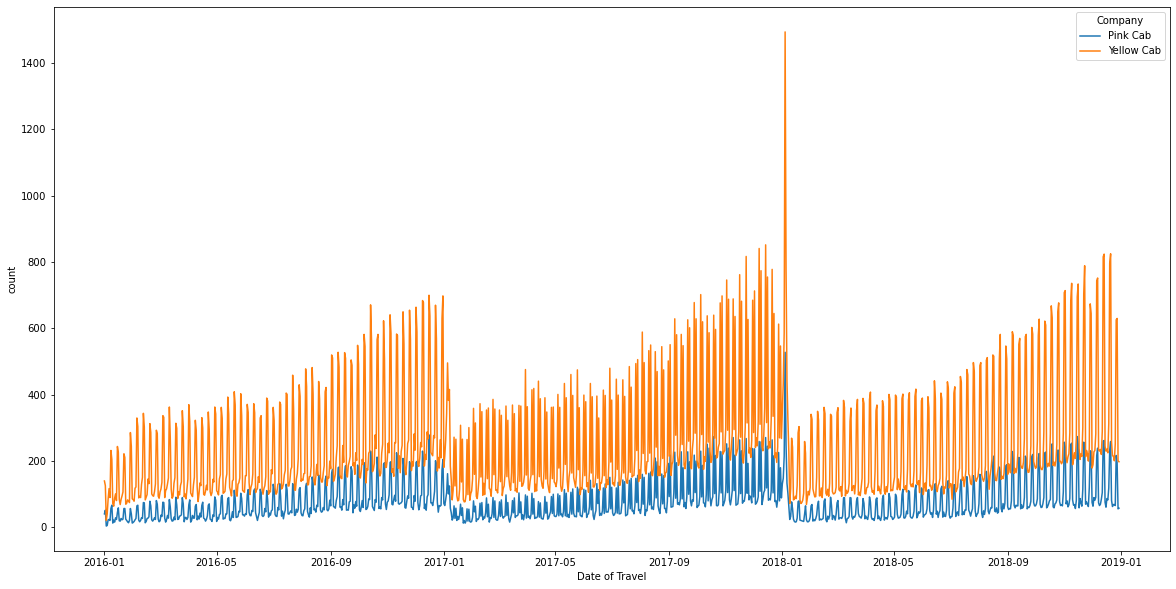

In [38]:
plt.figure(figsize=(20,10))
sb.lineplot(x="Date of Travel",y='count', hue='Company',data=g1)

> The first hypothesis is true as the graph shows

In [47]:
g2 = data.groupby(['Year of Travel', 'Company'], as_index=False)['Profit'].sum()

In [48]:
g2

,Year of Travel,Company,Profit
0,2016,Pink Cab,1.739883e+06
1,2016,Yellow Cab,1.407389e+07
2,2017,Pink Cab,2.015101e+06
3,2017,Yellow Cab,1.646427e+07
4,2018,Pink Cab,1.552345e+06
5,2018,Yellow Cab,1.348222e+07


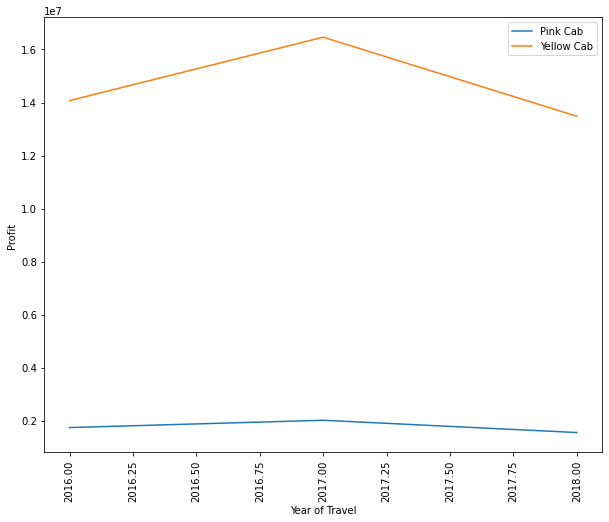

In [49]:
plt.rcParams['figure.figsize'] = 10,8

sb.lineplot(x="Year of Travel", y="Profit",hue='Company', data=g2)
plt.xticks(rotation=90);
plt.legend()

>Answering hypothesis 2: Yellow Cab has more profit

In [50]:
g3 = data.groupby(['City', 'Company'], as_index=False)['Profit'].sum()

In [51]:
g3

,City,Company,Profit
0,ATLANTA GA,Pink Cab,9.605008e+04
1,ATLANTA GA,Yellow Cab,7.463828e+05
2,AUSTIN TX,Pink Cab,1.474453e+05
3,AUSTIN TX,Yellow Cab,3.792557e+05
4,BOSTON MA,Pink Cab,2.620017e+05
5,BOSTON MA,Yellow Cab,1.506718e+06
6,CHICAGO IL,Pink Cab,3.187225e+05
7,CHICAGO IL,Yellow Cab,3.068591e+06
8,DALLAS TX,Pink Cab,2.473011e+04
9,DALLAS TX,Yellow Cab,1.104003e+06


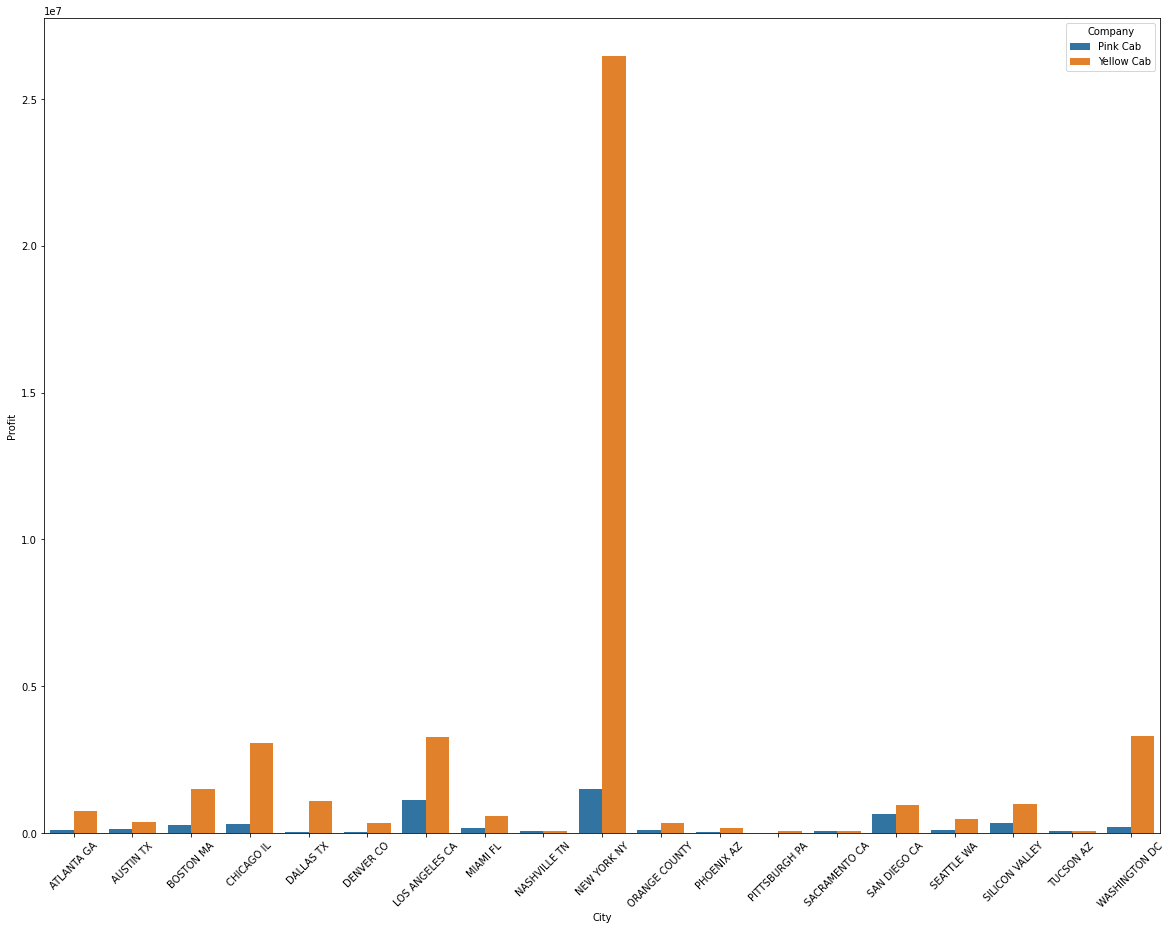

In [57]:
plt.figure(figsize=(20,15))
sb.barplot(data=g3, x='City',y='Profit',hue='Company');
plt.xticks(rotation=45);

plt.show()

>Answering hyp 3: In terms of profit, Yellow Cab is dominant in every city.

In [61]:
g4 = data.groupby(['City', 'Company'], as_index=False)['count'].count()
g4

,City,Company,count
0,ATLANTA GA,Pink Cab,1762
1,ATLANTA GA,Yellow Cab,5795
2,AUSTIN TX,Pink Cab,1868
3,AUSTIN TX,Yellow Cab,3028
4,BOSTON MA,Pink Cab,5186
5,BOSTON MA,Yellow Cab,24506
6,CHICAGO IL,Pink Cab,9361
7,CHICAGO IL,Yellow Cab,47264
8,DALLAS TX,Pink Cab,1380
9,DALLAS TX,Yellow Cab,5637


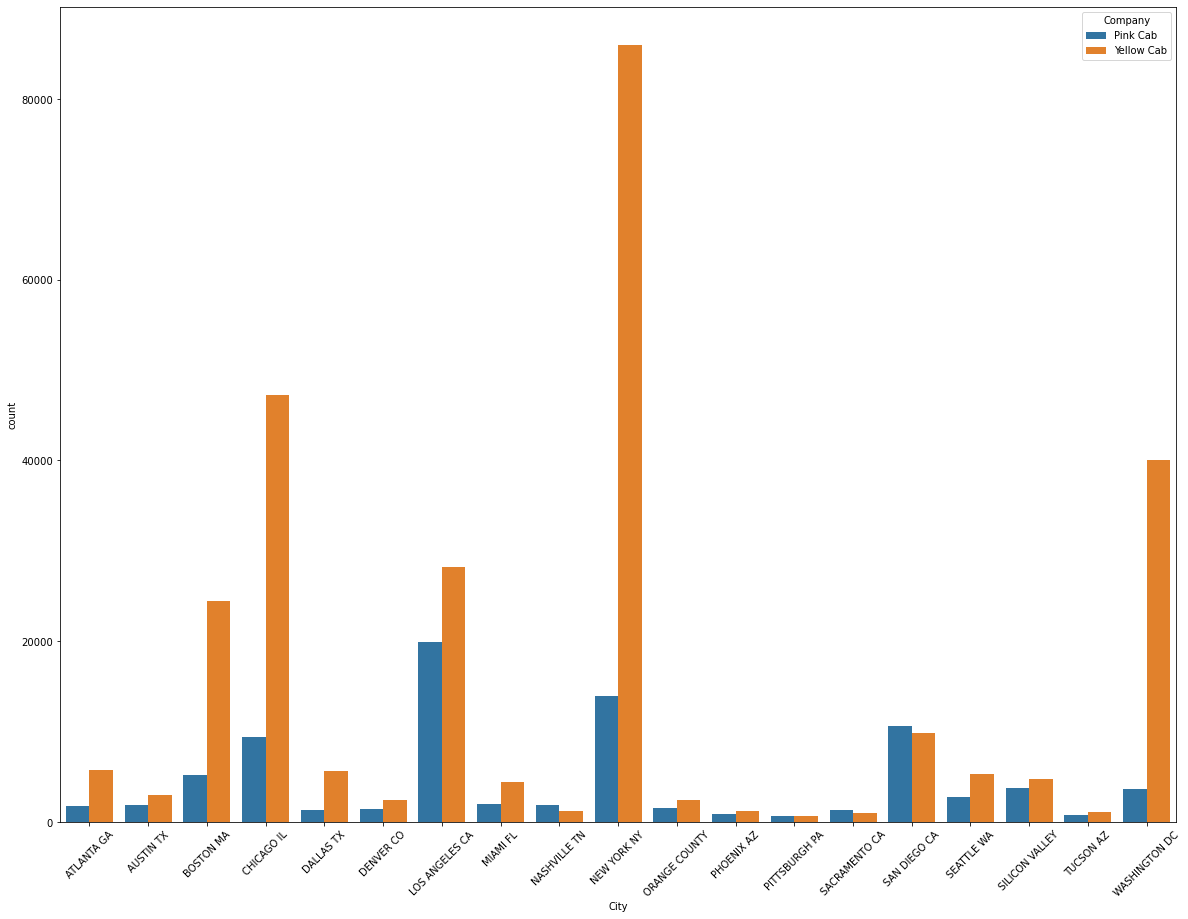

In [63]:
plt.figure(figsize=(20,15))
sb.barplot(data=g4, x='City',y='count',hue='Company');
plt.xticks(rotation=45);

plt.show()

>Interms of ride counts, Pink Cab is only slightly better at San Diego

In [69]:
g5 = Customer.groupby(['Age'], as_index=False)['Income (USD/Month)'].median()
g5

,Age,Income (USD/Month)
0,18,14270.0
1,19,14503.0
2,20,14535.0
3,21,14704.0
4,22,14733.0
5,23,14971.0
6,24,14676.0
7,25,14763.0
8,26,14558.0
9,27,14217.0


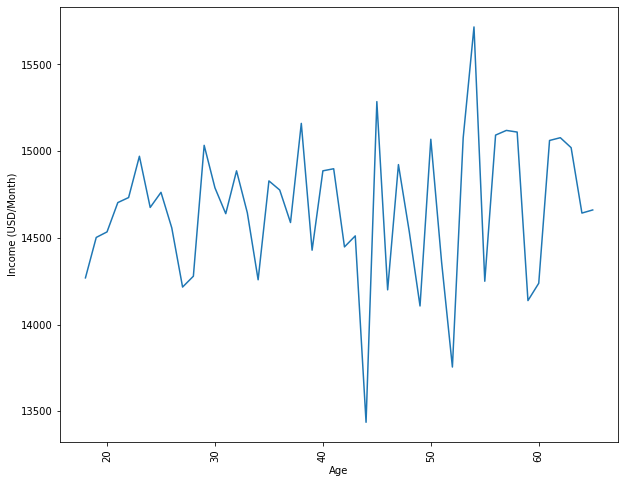

In [70]:
plt.rcParams['figure.figsize'] = 10,8
sb.lineplot(x="Age", y="Income (USD/Month)", data=g5)
plt.xticks(rotation=90);

> There is a slight positive trend between age and income as shown

<AxesSubplot:>

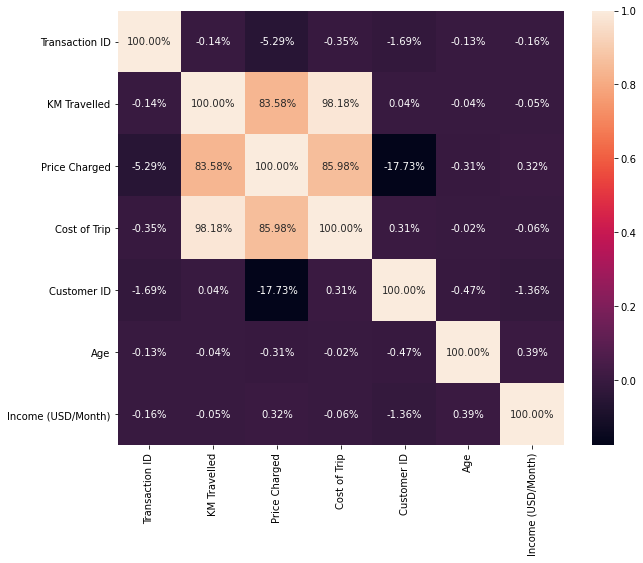

In [67]:
corrs=data.dropna().corr()
plt.figure(figsize=(10,8))
sb.heatmap(corrs,annot=True,fmt='.2%')